In [1]:
import os
import json
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, classification_report

In [2]:
working= os.environ.get("WORKING_DIRECTORY","/raid/homes/andrea.pedrotti/devel/control_mgt")
os.chdir(working)

In [38]:
def plot_roc_curve(fpr, tpr, title="Method Goes Here"):
    roc_auc = auc(fpr, tpr)
    plt.figure(layout="tight")
    plt.plot(fpr, tpr, color='darkorange', lw=1, label=f'ROC curve (area = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
    plt.xlim([-0.025, 1.025])
    plt.ylim([-0.025, 1.025])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")

def multiplot_roc_curve(fpr_list, tpr_list, model_list=["llama", "dpo-llama", "naive-dpo-llama"], title=""):
    plt.figure(layout="tight", figsize=(10, 10))
    
    for i, model_name in enumerate(model_list):
        fpr = fpr_list[i]
        tpr = tpr_list[i]
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=1, label=f'{model_name} - AUROC: {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='red', lw=1, linestyle='--')
    plt.xlim([-0.025, 1.025])
    plt.ylim([-0.025, 1.025])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")

## DetectAIve

In [52]:
data_llama = pd.read_csv("evaluation_code/evaluations/adversarial-dpo-iter1-filtered/2025-01-28-18-49/detectaive_detector/llama/clf_preds.csv")
data_dpo = pd.read_csv("evaluation_code/evaluations/adversarial-dpo-iter1-filtered/2025-01-30-23-48/detectaive_detector/dpo-llama-1st-iter/clf_preds.csv")
data_naive = pd.read_csv("evaluation_code/evaluations/adversarial-naive-dpo-iter1/2025-01-30-23-51/detectaive_detector/dpo-llama-1st-iter/clf_preds.csv")

In [53]:
data_llama.head(2)

,doc-id,y_pred,y_true,p_hwt,p_hwt_aipolish,p_mgt,p_mgt_humanized
0,35890902,0,0,-0.874802,2.673763,0.934402,-2.895111
1,37903647,1,0,-2.912217,-2.653045,6.989588,-1.965068


{'precision': 0.6600799811808986, 'recall': 0.9976888888888888, 'f1-score': 0.7945069724640759, 'support': 22500.0}


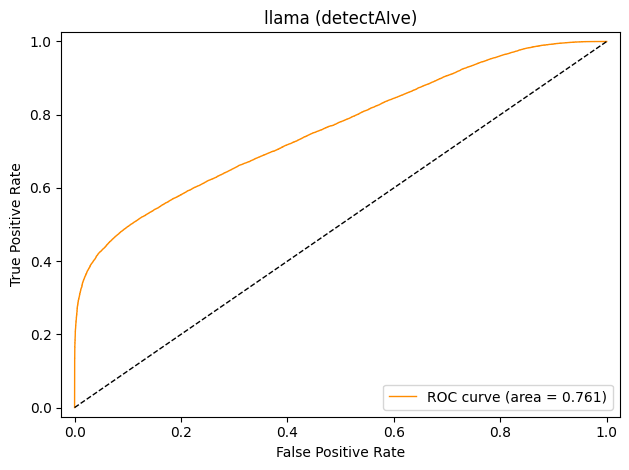

In [54]:
report = classification_report(y_true=data_llama.y_true, y_pred=data_llama.y_pred, output_dict=True)["1"]
print(report)
fpr, tpr, _ = roc_curve(y_true=data_llama.y_true.values, y_score=data_llama.p_mgt.values)
plot_roc_curve(fpr, tpr, title="llama (detectAIve)")

{'precision': 0.5388911049062625, 'recall': 0.6004444444444444, 'f1-score': 0.5680050451965525, 'support': 22500.0}


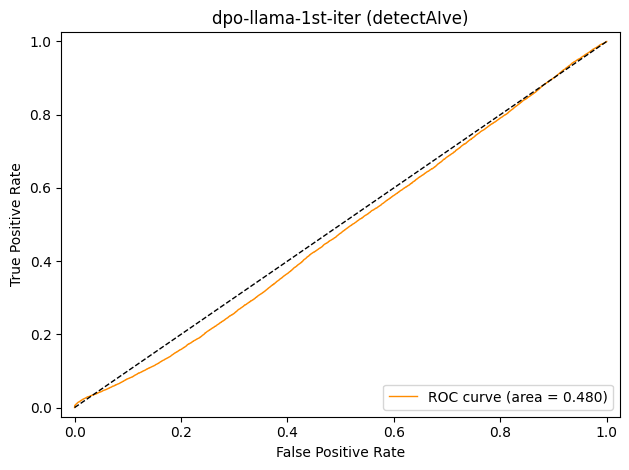

In [55]:
report = classification_report(y_true=data_dpo.y_true, y_pred=data_dpo.y_pred, output_dict=True)["1"]
print(report)
fpr, tpr, _ = roc_curve(y_true=data_dpo.y_true.values, y_score=data_dpo.p_mgt.values)
plot_roc_curve(fpr, tpr, title="dpo-llama-1st-iter (detectAIve)")

{'precision': 0.5316045380875203, 'recall': 0.5831111111111111, 'f1-score': 0.556167867740568, 'support': 22500.0}


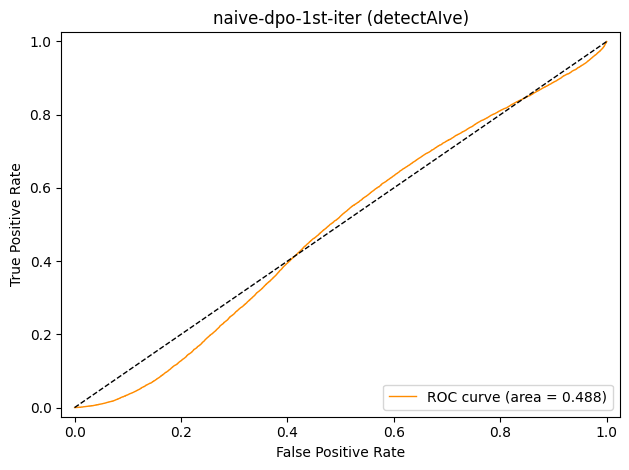

In [56]:
report = classification_report(y_true=data_naive.y_true, y_pred=data_naive.y_pred, output_dict=True)["1"]
print(report)
fpr, tpr, _ = roc_curve(y_true=data_naive.y_true.values, y_score=data_naive.p_mgt.values)
plot_roc_curve(fpr, tpr, title="naive-dpo-1st-iter (detectAIve)")

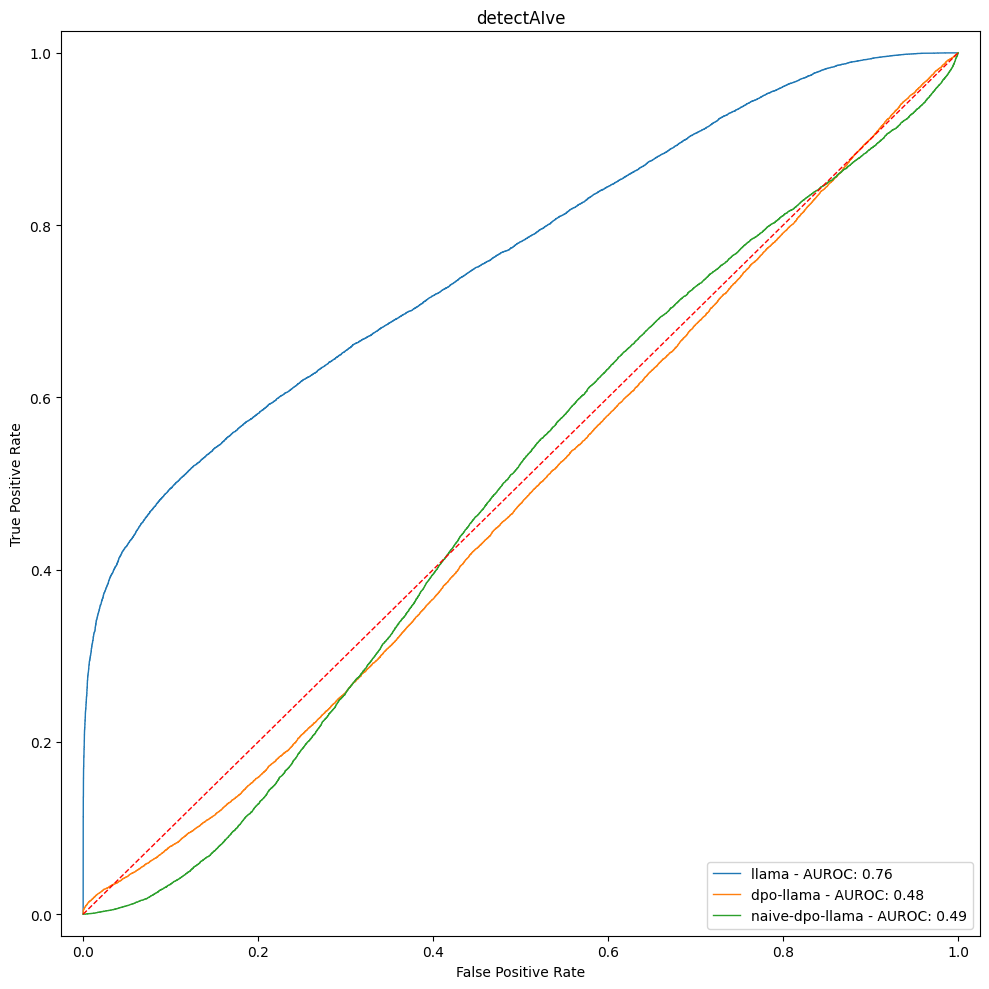

In [57]:
res_list = [
    roc_curve(y_true=data_llama.y_true.values, y_score=data_llama.p_mgt.values),
    roc_curve(y_true=data_dpo.y_true.values, y_score=data_dpo.p_mgt.values),
    roc_curve(y_true=data_naive.y_true.values, y_score=data_naive.p_mgt.values),
    ]
fpr_list, tpr_list, _ = zip(*res_list)
multiplot_roc_curve(fpr_list, tpr_list, title="detectAIve")

## Mage

In [58]:
data_llama = pd.read_csv("evaluation_code/evaluations/adversarial-dpo-iter1-filtered/2025-01-28-18-49/mage_detector/llama/clf_preds.csv")
data_dpo = pd.read_csv("evaluation_code/evaluations/adversarial-dpo-iter1-filtered/2025-01-30-23-48/mage_detector/dpo-llama-1st-iter/clf_preds.csv")
data_naive = pd.read_csv("evaluation_code/evaluations/adversarial-naive-dpo-iter1/2025-01-30-23-51/mage_detector/dpo-llama-1st-iter/clf_preds.csv")

In [59]:
data_llama.head(2)
data_llama["p_mgt"] = - data_llama["conf_mgt"]
data_dpo["p_mgt"] = - data_dpo["conf_mgt"]
data_naive["p_mgt"] = - data_naive["conf_mgt"]

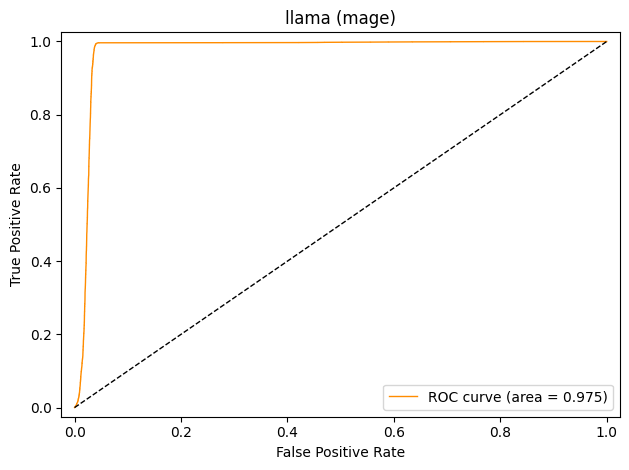

In [60]:
classification_report(y_true=data_llama.y_true, y_pred=data_llama.y_pred, output_dict=True)["1"]
fpr, tpr, _ = roc_curve(y_true=data_llama.y_true.values, y_score=data_llama.p_mgt.values)
plot_roc_curve(fpr, tpr, title="llama (mage)")

{'precision': 0.4611155167856199, 'recall': 0.38764444444444446, 'f1-score': 0.4212000482916818, 'support': 22500.0}


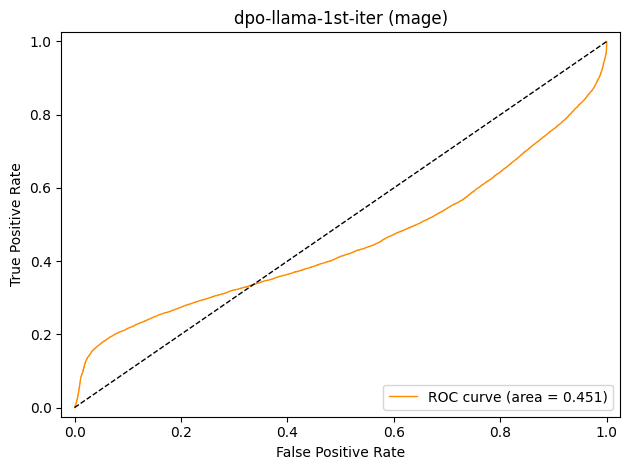

In [61]:
report = classification_report(y_true=data_dpo.y_true, y_pred=data_dpo.y_pred, output_dict=True)["1"]
print(report)
fpr, tpr, _ = roc_curve(y_true=data_dpo.y_true.values, y_score=data_dpo.p_mgt.values)
plot_roc_curve(fpr, tpr, title="dpo-llama-1st-iter (mage)")

{'precision': 0.3794593936442226, 'recall': 0.2770222222222222, 'f1-score': 0.32024867697682785, 'support': 22500.0}


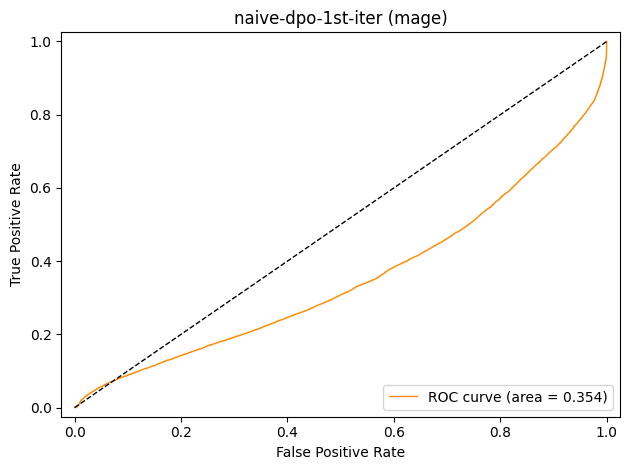

In [62]:
report = classification_report(y_true=data_naive.y_true, y_pred=data_naive.y_pred, output_dict=True)["1"]
print(report)
fpr, tpr, _ = roc_curve(y_true=data_naive.y_true.values, y_score=data_naive.p_mgt.values)
plot_roc_curve(fpr, tpr, title="naive-dpo-1st-iter (mage)")

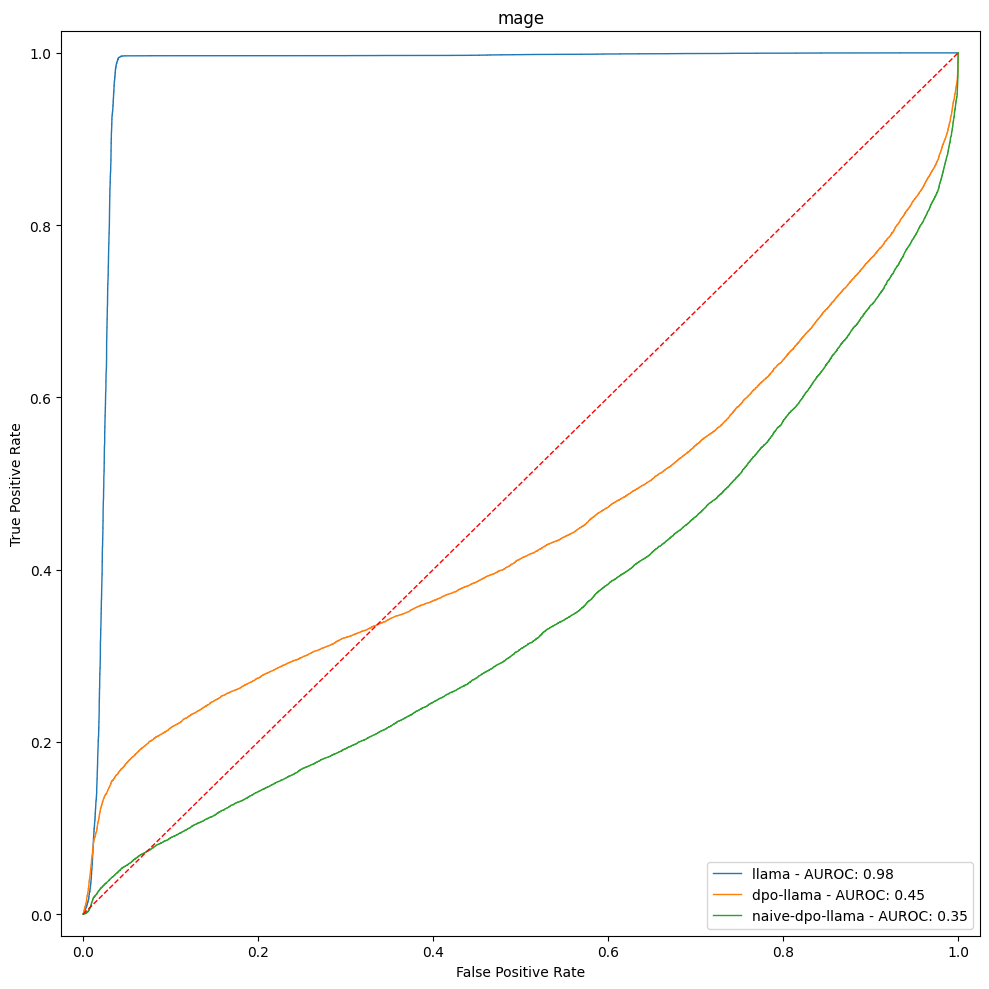

In [63]:
res_list = [
    roc_curve(y_true=data_llama.y_true.values, y_score=data_llama.p_mgt.values),
    roc_curve(y_true=data_dpo.y_true.values, y_score=data_dpo.p_mgt.values),
    roc_curve(y_true=data_naive.y_true.values, y_score=data_naive.p_mgt.values),
    ]
fpr_list, tpr_list, _ = zip(*res_list)
multiplot_roc_curve(fpr_list, tpr_list, title="mage")

## Radar

In [64]:
data_llama = pd.read_csv("evaluation_code/evaluations/adversarial-dpo-iter1-filtered/2025-01-28-18-49/radar_detector/llama/clf_preds.csv")
data_dpo = pd.read_csv("evaluation_code/evaluations/adversarial-dpo-iter1-filtered/2025-01-30-23-48/radar_detector/dpo-llama-1st-iter/clf_preds.csv")
data_naive = pd.read_csv("evaluation_code/evaluations/adversarial-naive-dpo-iter1/2025-01-30-23-51/radar_detector/dpo-llama-1st-iter/clf_preds.csv")

{'precision': 0.9921909532930603, 'recall': 0.8978666666666667, 'f1-score': 0.9426751592356688, 'support': 22500.0}


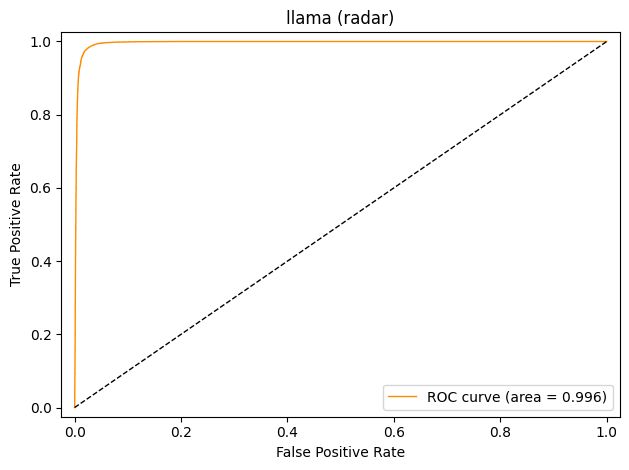

In [65]:
report = classification_report(y_true=data_llama.y_true, y_pred=data_llama.y_pred, output_dict=True)["1"]
print(report)
fpr, tpr, _ = roc_curve(y_true=data_llama.y_true.values, y_score=data_llama.p_mgt.values)
plot_roc_curve(fpr, tpr, title="llama (radar)")

{'precision': 0.9764024933214603, 'recall': 0.2924, 'f1-score': 0.4500307818592243, 'support': 22500.0}


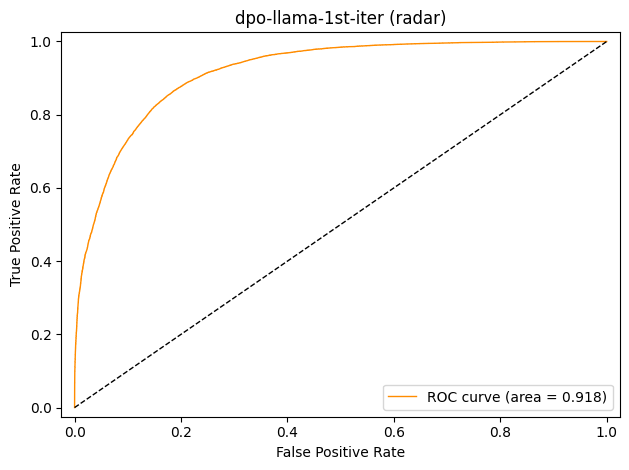

In [66]:
report = classification_report(y_true=data_dpo.y_true, y_pred=data_dpo.y_pred, output_dict=True)["1"]
print(report)
fpr, tpr, _ = roc_curve(y_true=data_dpo.y_true.values, y_score=data_dpo.p_mgt.values)
plot_roc_curve(fpr, tpr, title="dpo-llama-1st-iter (radar)")

{'precision': 0.9882959146117041, 'recall': 0.5967111111111111, 'f1-score': 0.7441319107662464, 'support': 22500.0}


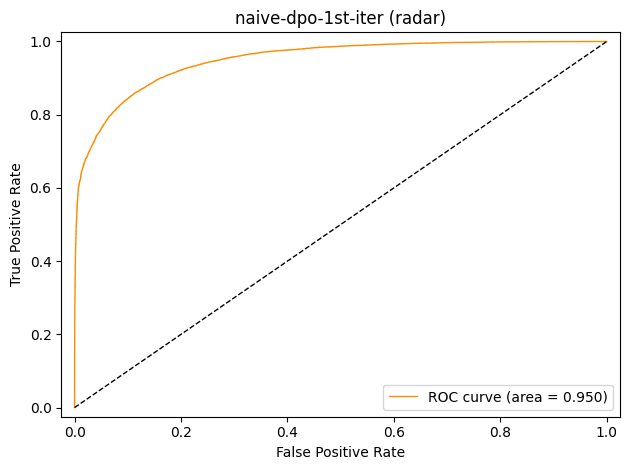

In [67]:
report = classification_report(y_true=data_naive.y_true, y_pred=data_naive.y_pred, output_dict=True)["1"]
print(report)
fpr, tpr, _ = roc_curve(y_true=data_naive.y_true.values, y_score=data_naive.p_mgt.values)
plot_roc_curve(fpr, tpr, title="naive-dpo-1st-iter (radar)")

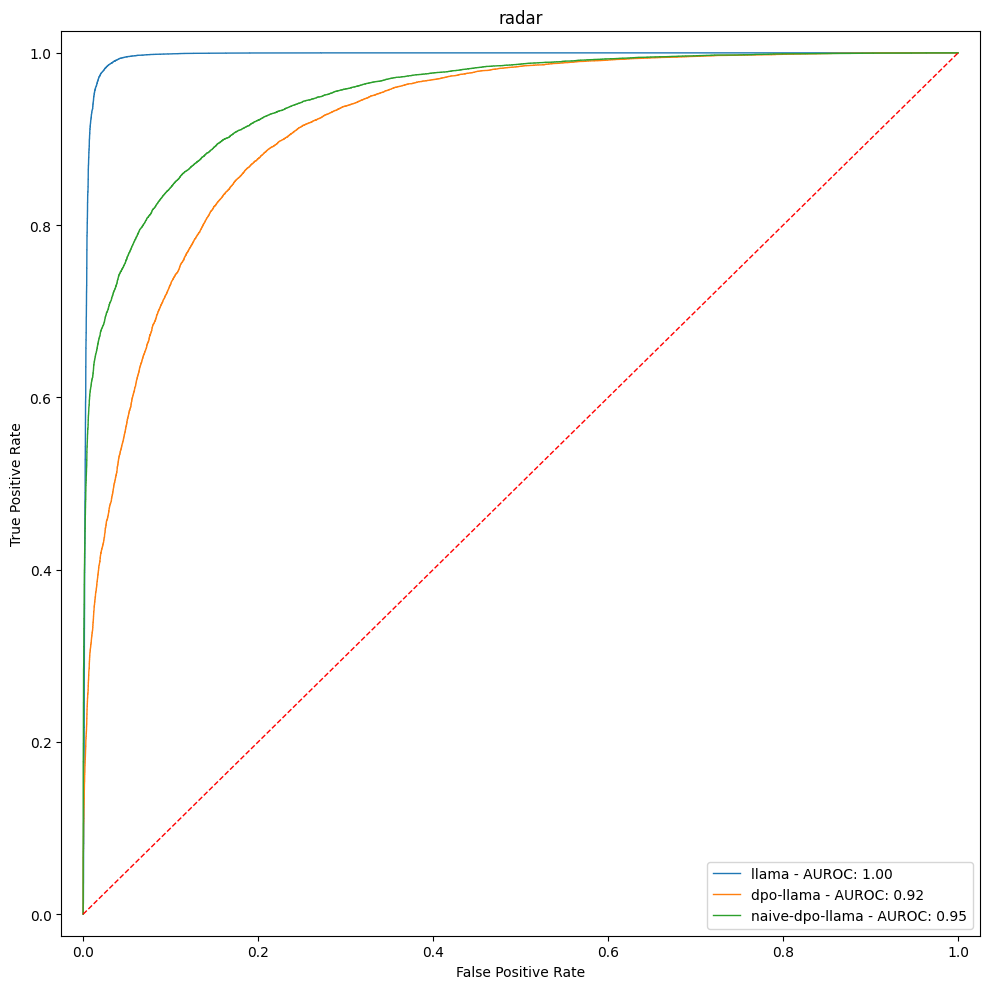

In [68]:
res_list = [
    roc_curve(y_true=data_llama.y_true.values, y_score=data_llama.p_mgt.values),
    roc_curve(y_true=data_dpo.y_true.values, y_score=data_dpo.p_mgt.values),
    roc_curve(y_true=data_naive.y_true.values, y_score=data_naive.p_mgt.values),
    ]
fpr_list, tpr_list, _ = zip(*res_list)
multiplot_roc_curve(fpr_list, tpr_list, title="radar")